In [41]:
# Task 1

# Probability of the event that pattern 012 occurs in generated sequence 
#
# From the opposite, probability of event that there is not any pattern 012 in any 3 neighbourhood digits:
# P(NaP) = 1 - (1/10)*(1/10)*(1/10) = 999/1000 (Nap for Not a Pattern)
# In sequence of size n there is only n-2 positions to situate 3-digit pattern
# Total probability of event that there is not the 3-digit pattern in sequence:
# P(NPS) =  P(NaP) ^ (n-2) (NPS for No Pattern Sequence) 
# And the probability that there is the 3-digit pattern in sequence:
# P(012 in seq) = 1 -  P(NPS) = 1 - (999/1000) ^(n-2)

n <- c(100, 200, 1000) # sequence length
k <- 3 # pattern length
m <- 10000 # experiments
p <- c(0, 1, 2) # pattern

for(l in n){
    start_time <- Sys.time() 
    num <- 0 # number of coincidence
    
    for(i in 1:m){
        s <- sample(0:9, l, replace=T) # sequence
        if(sum(colSums(matrix(c(s[1:(l-2)],s[2:(l-1)],s[3:l]), ncol=l-k+1, byrow=TRUE) == p) == k)>0){
            num <- num +1
        }
    }

    end_time <- Sys.time()
   
    print( sprintf("sample: %d", l))
    print( sprintf( "theory: %f", 1 - ( (999/1000) ^ (l-2) ) ))
    print( sprintf( "experiment: %f", num / m))
    print(end_time - start_time)
    print("---------------------")
}

[1] "sample: 100"
[1] "theory: 0.093396"
[1] "experiment: 0.090800"
Time difference of 0.2445862 secs
[1] "---------------------"
[1] "sample: 200"
[1] "theory: 0.179711"
[1] "experiment: 0.182900"
Time difference of 0.2988322 secs
[1] "---------------------"
[1] "sample: 1000"
[1] "theory: 0.631568"
[1] "experiment: 0.637400"
Time difference of 0.8428957 secs
[1] "---------------------"


In [18]:
# Task 2

# Calculate  expected number of occurrences of 012 in sequence
#
# E = Z(xi*p(xi))
# Every 3 digits  can be represented as indicator I 
# E(I) = { 1 , p
#        { 0 , 1-p
# So E(experiment) = n*E(I) = n*p, where n - number of positions to situate 3-digit pattern, p - probability of 
# indicator show true - the combination of 3 digit equal 012 
# So E(experiment) = (k-2)*(1/1000)

n <- c(100, 200, 1000) # sequence length
k <- 3 # pattern length
N <- 10000 # experiments
p <- c(0, 1, 2) # pattern

for(l in n){
    start_time <- Sys.time() 
    num <- 0 # number of coincidence
    
    for(i in 1:N){
        s <- sample(0:9, l, replace=T) # sequence
         num <- num + sum(colSums(matrix(c(s[1:(l-2)],s[2:(l-1)],s[3:l]), ncol=l-k+1, byrow=TRUE) == p) == k)
    }

    end_time <- Sys.time()
   
    print( sprintf("sample: %d", l))
    print( sprintf( "theory: %f", (1/1000) * (l-2) ) )
    print( sprintf( "experiment: %f", num / N))
    print(end_time - start_time)
    print("---------------------")
}

[1] "sample: 100"
[1] "theory: 0.098000"
[1] "experiment: 0.091800"
Time difference of 0.245312 secs
[1] "---------------------"
[1] "sample: 200"
[1] "theory: 0.198000"
[1] "experiment: 0.193500"
Time difference of 0.3020155 secs
[1] "---------------------"
[1] "sample: 1000"
[1] "theory: 0.998000"
[1] "experiment: 0.980200"
Time difference of 0.8520677 secs
[1] "---------------------"


In [40]:
# Task 3

# Calculate the expected length of the sequence obtained
# 
# For geometriacal random variable its expected equal: E(grv) = 1/p
# where p - probability that the combination of 3 digit equal 012 and equal 1/1000
# So E(grv) = 1/(1/1000) = 1000

n <- 10000 # sequence length
k <- 3 # pattern length
m <- 2000 # experiments
p <- c(0, 1, 2) # pattern


start_time <- Sys.time() 
num <- 0 # number of coincidence
    
i <- 0
while(i < m){
    s <- sample(0:9, n, replace=T) # sequence
    
    for(j in 1:(n-k+1)){  
        if(s[j] == p[1]){
            if(s[j+1] == p[2]){
                if(s[j+2] == p[3]){
                    num <- num + j
                    break
                }
            }
        }
    }
    i <- i + 1 
}

end_time <- Sys.time()

print( sprintf("sample: %d", n))
print( sprintf( "theory: %f", 1 / ( 1/1000) ) )
print( sprintf( "experiment: %f", num / m))
print(end_time - start_time)
print("---------------------")


[1] "sample: 10000"
[1] "theory: 1000.000000"
[1] "experiment: 1002.321000"
Time difference of 0.5158162 secs
[1] "---------------------"


[1] "max difference: 0.059450"
Time difference of 0.03790545 secs
[1] "---------------------"


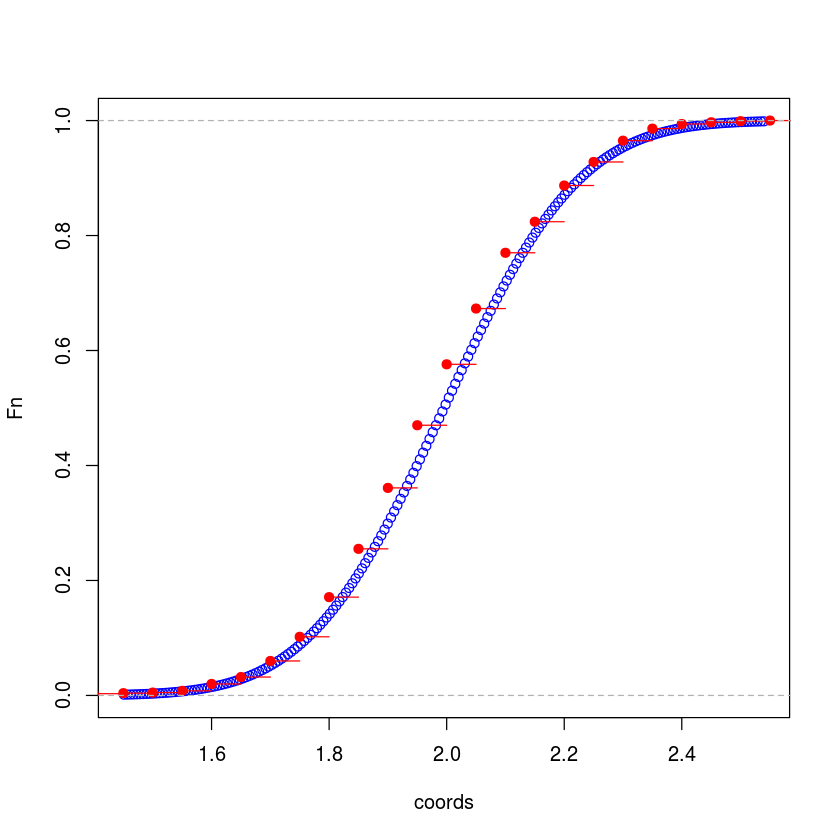

In [144]:
# Task 4

n <- 20 # sample
N <- 1000 # experiments
k <- 0+1+2 # for id 012

start_time <- Sys.time() 

# ---------------------
# 1) generating of sample matrix
# ---------------------

mx <- matrix(sample(1:k, N * n, replace = T), N) # sample matrix
 
# ---------------------
# 2) getting vector of means by reducing every row
# ---------------------

for(i in 1:N){                                                                      
    mx[i, 1] <- mean(mx[i, ])
}

v <- mx[,1] # vector of means

# ---------------------
# 3) getting mean from vector of means
# ---------------------

mean_v <- mean(v) # mean

# ---------------------
# 4) getting standard deviation from vector of means
# ---------------------

sigma <- sd(v) # standard deviation

# ---------------------
# 5) generating of sequence of 200 coordinates in interval from mean_v - (3 * sigma) to mean_v + (3 * sigma)
# ---------------------

coords <- seq(mean_v - (3 * sigma) , mean_v + (3 * sigma), length.out = 200) 

# ---------------------
# 6) getting normal distribution 
# ---------------------

Fn <- pnorm(coords, mean = mean_v , sd = sigma)

# ---------------------
# 7) getting empirical distribution function
# ---------------------

Fe <- ecdf(v)      

# ---------------------
# 8) creating array of differences 
# ---------------------

d <- 0 # array of different values

for (i in 1:200){ 
    d[i] <- abs(Fn[i] - Fe(coords[i]))
}

# ---------------------
# 9) displaying normal distribution and empirical distribution on the graph 
# ---------------------

plot(coords, Fn,  col = "blue", main = NA)
plot(Fe, col = "red", add = T)

print(sprintf("max difference: %f", max(d)))
end_time <- Sys.time()
print(end_time - start_time)
print("---------------------")
